In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
FILE_LOC = './datasets/COVID-19_Case_Surveillance_Public_Use_Data.csv'
df = pd.read_csv(FILE_LOC, low_memory=False)
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/23,2020/03/31,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
1,2020/03/22,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Yes,Unknown,Unknown,Unknown
2,2020/03/22,2020/03/22,2020/03/23,2020/03/22,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
3,2020/03/23,2020/03/23,2020/03/23,2020/03/23,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,No,No
4,2020/03/23,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown


In [3]:
df.columns

Index(['cdc_case_earliest_dt ', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [4]:
df['race_ethnicity_combined'].value_counts()

Unknown                                                 5175054
White, Non-Hispanic                                     4200325
Hispanic/Latino                                         1580091
Black, Non-Hispanic                                      983879
Missing                                                  625992
Multiple/Other, Non-Hispanic                             478992
Asian, Non-Hispanic                                      246432
American Indian/Alaska Native, Non-Hispanic               98864
Native Hawaiian/Other Pacific Islander, Non-Hispanic      26195
Name: race_ethnicity_combined, dtype: int64

In [5]:
df[['hosp_yn','icu_yn','death_yn','medcond_yn']] = df[['hosp_yn','icu_yn','death_yn','medcond_yn']].replace(['Yes','No','Unknown','Missing'],[1,0,-9999,np.nan]).copy().astype(np.float16)
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/23,2020/03/31,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",-10000.0,-10000.0,-10000.0,-10000.0
1,2020/03/22,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,1.0,-10000.0,-10000.0,-10000.0
2,2020/03/22,2020/03/22,2020/03/23,2020/03/22,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,0.0,0.0,0.0,0.0
3,2020/03/23,2020/03/23,2020/03/23,2020/03/23,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,0.0,NaN,0.0,0.0
4,2020/03/23,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,-10000.0,-10000.0,-10000.0,-10000.0


In [6]:
df['icu_yn'].value_counts()

-10000.0    1756668
 0.0        1097406
 1.0          75664
Name: icu_yn, dtype: int64

In [94]:
df['sex'].value_counts()

Female     6920504
Male       6328300
Unknown     129047
Missing      37713
Other          260
Name: sex, dtype: int64

In [93]:
# convert to datetime
df['cdc_case_earliest_datetime'] = pd.to_datetime(df['cdc_case_earliest_dt '], format='%Y/%m/%d')
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_datetime
0,2020/03/23,2020/03/31,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",-10000.0,-10000.0,-10000.0,-10000.0,2020-03-23
1,2020/03/22,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,1.0,-10000.0,-10000.0,-10000.0,2020-03-22
2,2020/03/22,2020/03/22,2020/03/23,2020/03/22,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,0.0,0.0,0.0,0.0,2020-03-22
3,2020/03/23,2020/03/23,2020/03/23,2020/03/23,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,0.0,NaN,0.0,0.0,2020-03-23
4,2020/03/23,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,-10000.0,-10000.0,-10000.0,-10000.0,2020-03-23


In [7]:
# Questions about the data:
# 1. Is there a relationship between the race/ethnicity of the covid victim and the likelyhood that data is missing?
# 2. In the non-missing data, what is the effect of race/ethnicity on the change of hospitialization, icu, or death?

In [8]:
races_ethnicities = df['race_ethnicity_combined'].unique()
races_ethnicities = set(races_ethnicities) - set([np.nan])
races_ethnicities

{'American Indian/Alaska Native, Non-Hispanic',
 'Asian, Non-Hispanic',
 'Black, Non-Hispanic',
 'Hispanic/Latino',
 'Missing',
 'Multiple/Other, Non-Hispanic',
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
 'Unknown',
 'White, Non-Hispanic'}

In [9]:
def num_missing(race, indicator):
    race_df = df.loc[df.race_ethnicity_combined==race]
    return race_df[indicator].isna().sum() / len(race_df[indicator])

num_missing('Black, Non-Hispanic', indicator='death_yn')

0.3802774528168606

In [10]:
import tqdm.notebook as tqdm

missing_percents = {}
for re in tqdm.tqdm(races_ethnicities):
    for indicator in ['hosp_yn','icu_yn','death_yn','medcond_yn']:
        missing_percents[(re,indicator)] = num_missing(re,indicator)

In [104]:
def print_indicator_missing(indicator):
    for re in races_ethnicities:
        print(f'Missing values of {re} for {indicator}: {missing_percents[(re,indicator)]:.2%}')

def plot_indicator_missing(indicator, add_labels=True):
    vals = [missing_percents[(re,indicator)] for re in races_ethnicities if re]
    labels = [re.split(',')[0] for re in races_ethnicities]
    x = np.arange(len(vals))
    plt.bar(x,vals)
    plt.ylim([0,1])
    
    if add_labels:
        plt.gca().set_xticks(x)
        plt.gca().set_xticklabels(labels, rotation=90)
    else:
        plt.gca().set_xticklabels([])
    plt.title('Percentage of Missing Values in {}'.format(indicator.title()))
    
plot_indicator('hosp_yn')

KeyError: (None, 'hosp_yn')

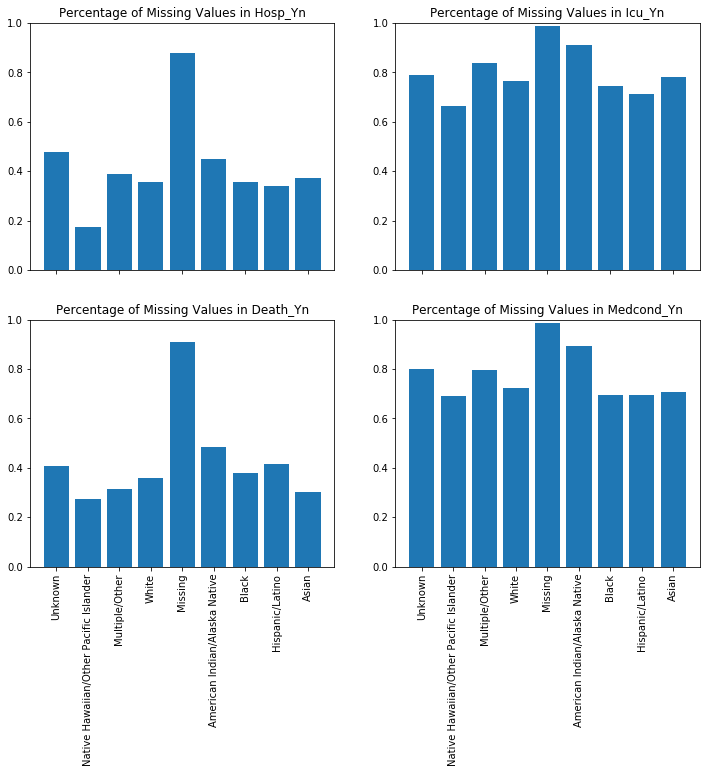

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plot_indicator('hosp_yn',add_labels=False)
plt.subplot(222)
plot_indicator('icu_yn',add_labels=False)
plt.subplot(223)
plot_indicator('death_yn')
plt.subplot(224)
plot_indicator('medcond_yn')

In [120]:
def percent_indicator(indicator, race=None, sex=None, dates=None):
    filtered_df = df.copy()
    if race:
        filtered_df = filtered_df.loc[(df.race_ethnicity_combined==race)]
    if sex:
        filtered_df = filtered_df.loc[df.sex==sex]
    if dates:
        filtered_df = filtered_df.loc[(df.cdc_case_earliest_datetime>=dates[0]) &
                                     (df.cdc_case_earliest_datetime>=dates[1])]
    filtered_in = filtered_df[indicator].replace(-10000.0, np.nan).dropna(axis=0).astype(np.float32)
    if type(indicator)==list:
        filtered_in = filtered_in.prod(axis=1)
    return filtered_in.sum(axis=0) / filtered_in.count()

#def total_indicator_rate(indicator):
#    return len(race_filtered_df.loc[])
a = percent_indicator('death_yn',race='White, Non-Hispanic',sex='Male',dates=('2020-03-20','2020-04-20'))
b = percent_indicator('death_yn',race='Black, Non-Hispanic',sex='Male',dates=('2020-03-20','2020-04-20'))

In [121]:
print(a, b)

0.04446234159015134 0.046128606972571644


In [68]:
icu_and_death_mortality = percent_indicator_based_on_race(['icu_yn','death_yn'],race=None)
icu_and_death_mortality

0.03464065106535224

In [168]:
def plot_indicator_based_on_factors(indicator, dates=None):
    data = pd.DataFrame(columns=['Race','Sex','Percent'])
    for re in races_ethnicities:
        if re:
            for sex in ['Male','Female']:
                race = re.split(',')[0]
                per = percent_indicator(indicator,race=re,sex=sex,dates=dates)
                data = data.append({'Race':race,'Sex':sex,'Percent':per},
                                  ignore_index=True)
    ax = data.groupby(['Race','Sex']).mean().unstack(level=1).plot(kind='bar',figsize=(10,8))
    ax.set_ylabel(indicator.split('_')[0].title()+' Rate')
    ax.set_ylim([0,1])
    if dates:
        ax.set_title('{} to {}'.format(dates[0].date(),dates[1].date()))
    return ax.get_figure()
plt.figure(figsize=(10,8))
plot_indicator_based_on_factors('hosp_yn')

KeyboardInterrupt: 

<Figure size 720x576 with 0 Axes>

In [ ]:
def plot_dates(period):
    start_date = df['cdc_case_earliest_datetime'].min().timestamp()
    end_date = df['cdc_case_earliest_datetime'].max().timestamp()
    
    for date in tqdm.tqdm(range(int(start_date),int(end_date),two_weeks)):
        d1 = pd.to_datetime(date, unit='s')
        d2 = pd.to_datetime(date+two_weeks, unit='s')
        fig = plot_indicator_based_on_factors('hosp_yn',dates=(d1,d2))
        fig.savefig('./graphs/hospitalizations/{} 14-dayrollingavg.png'.format(d2.date()))
two_weeks = int(1.21E6)
plot_dates(two_weeks)

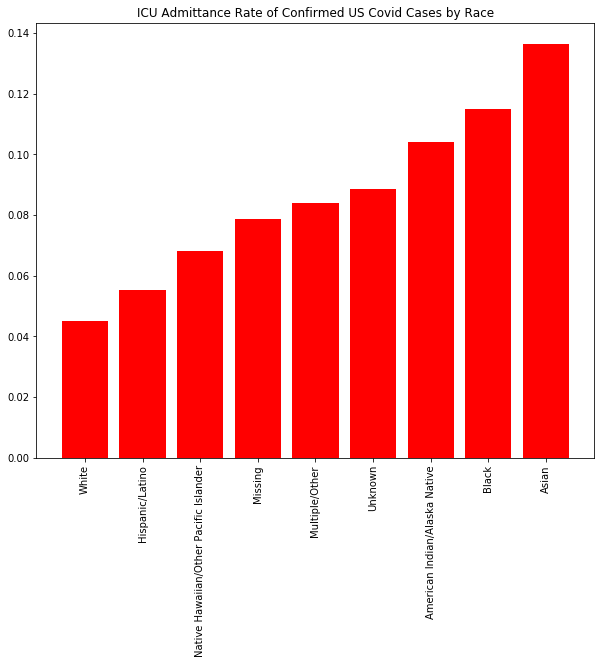

In [77]:
plt.figure(figsize=(10,8))
plot_indicator_based_on_race('icu_yn')

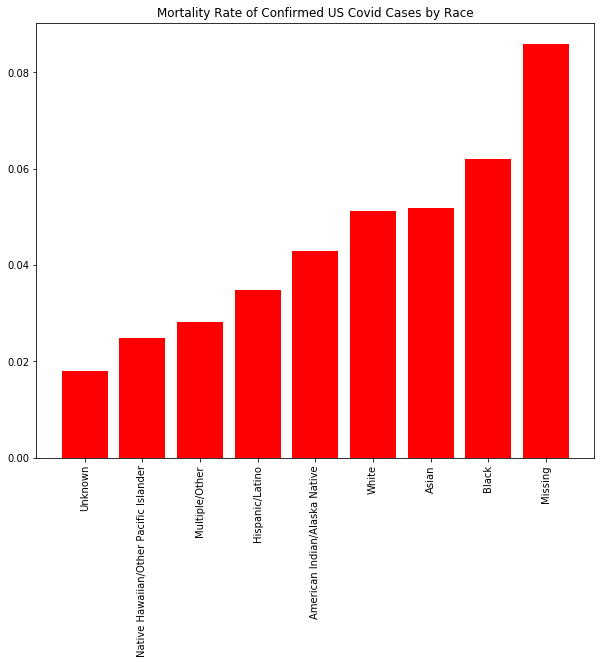

In [78]:
plt.figure(figsize=(10,8))
plot_indicator_based_on_race('death_yn')

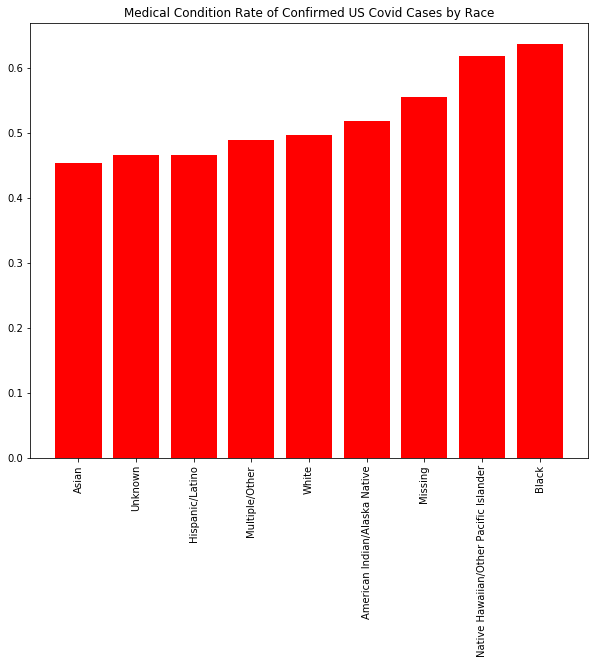

In [79]:
plt.figure(figsize=(10,8))
plot_indicator_based_on_race('medcond_yn')

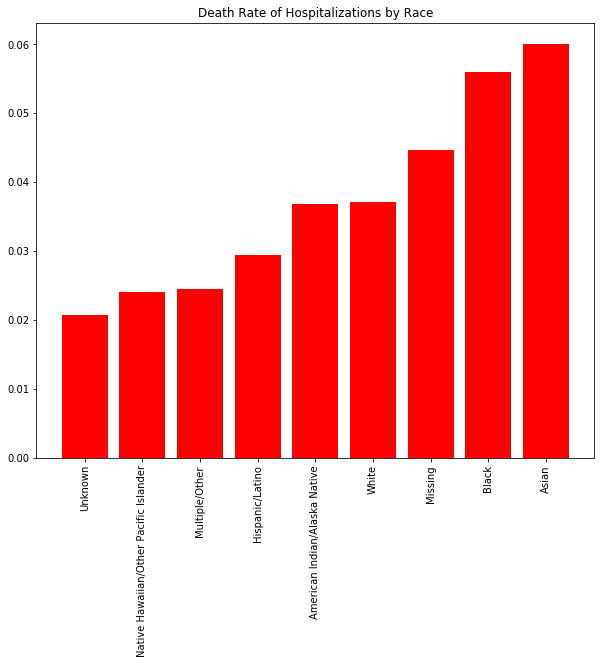

In [81]:
plt.figure(figsize=(10,8))
plt.title('Death Rate of Hospitalizations by Race')
plot_indicator_based_on_race(['hosp_yn','death_yn'])

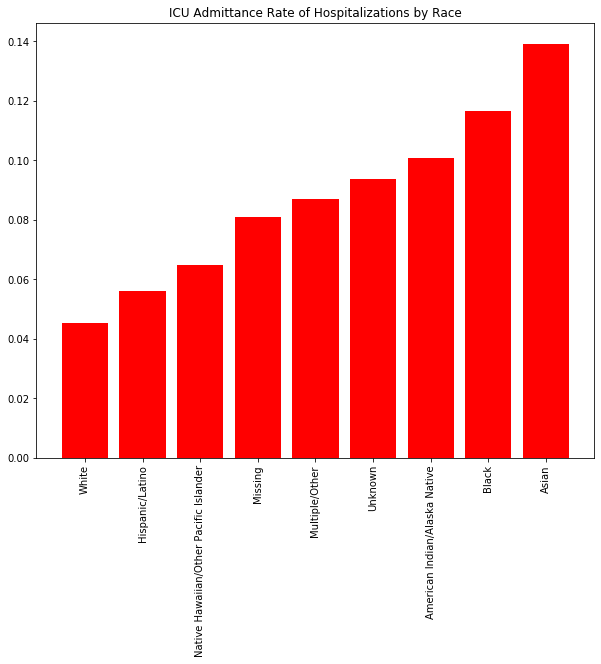

In [82]:
plt.figure(figsize=(10,8))
plt.title('ICU Admittance Rate of Hospitalizations by Race')
plot_indicator_based_on_race(['icu_yn','hosp_yn'])